In [720]:
#Import Dependencies

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

In [722]:
# Loading the data

bike_sharing_df = pd.read_csv("day.csv")
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [724]:
bike_sharing_df.shape

(730, 16)

In [726]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [728]:
bike_sharing_df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [730]:
bike_sharing_df.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windsp

In [732]:
bike_sharing_df.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [734]:
bike_sharing_df.size

11680

In [736]:
bike_sharing_df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [738]:
bike_sharing_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

In [740]:
bike_sharing_df.axes

[RangeIndex(start=0, stop=730, step=1),
 Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
        'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
        'casual', 'registered', 'cnt'],
       dtype='object')]

In [742]:
bike_sharing_df.values

array([[1, '01-01-2018', 1, ..., 331, 654, 985],
       [2, '02-01-2018', 1, ..., 131, 670, 801],
       [3, '03-01-2018', 1, ..., 120, 1229, 1349],
       ...,
       [728, '29-12-2019', 1, ..., 159, 1182, 1341],
       [729, '30-12-2019', 1, ..., 364, 1432, 1796],
       [730, '31-12-2019', 1, ..., 439, 2290, 2729]], dtype=object)

In [744]:
# Cleaning the data

bike_sharing_df['days_count'] = (pd.to_datetime(bike_sharing_df['dteday'],format = '%d-%m-%Y')-pd.to_datetime('01-01-2018', format= '%d-%m-%Y')).dt.days
bike_sharing_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,days_count
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,0
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,1
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,3
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,4


In [746]:
# droping columns with not much use

bike_sharing_df.drop(['instant','dteday','casual','registered'], axis = 1, inplace = True)
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_count
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,2
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,3
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,4


In [748]:
bike_sharing_df.season.value_counts()

season
3    188
2    184
1    180
4    178
Name: count, dtype: int64

In [750]:
bike_sharing_df.weathersit.value_counts()

weathersit
1    463
2    246
3     21
Name: count, dtype: int64

In [752]:
bike_sharing_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_count
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,-0.003081,0.013762,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584,0.413587
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,-0.005466,-0.002945,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728,0.866026
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,0.009523,-0.004688,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191,0.498251
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.101962,-0.252948,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764,0.016275
weekday,-3.081198e-03,-5.466369e-03,9.522969e-03,-0.101962,1.000000,0.035800,0.031112,-0.000168,-0.007539,-0.052290,0.014283,0.067534,-0.000023
workingday,1.376178e-02,-2.945396e-03,-4.687953e-03,-0.252948,0.035800,1.000000,0.060236,0.053470,0.052940,0.023202,-0.018666,0.062542,-0.004619
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.031112,0.060236,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929,-0.021862
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,-0.000168,0.053470,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044,0.150738
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,-0.007539,0.052940,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685,0.152773
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,-0.052290,0.023202,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543,0.016080


In [754]:
# Handling Outliers

bike_sharing_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'days_count'],
      dtype='object')

In [756]:
bike_sharing_df.nunique()

season          4
yr              2
mnth           12
holiday         2
weekday         7
workingday      2
weathersit      3
temp          498
atemp         689
hum           594
windspeed     649
cnt           695
days_count    730
dtype: int64

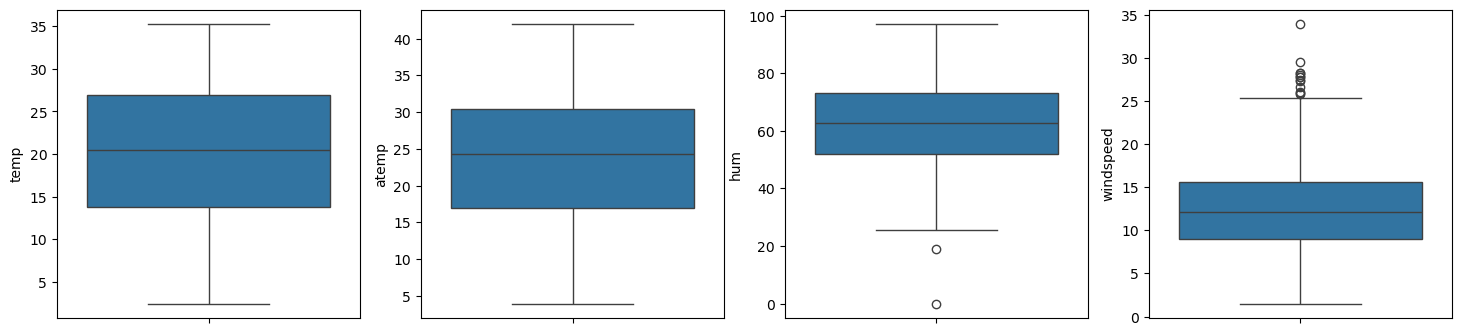

In [758]:
# Draw box plot for independent variables with continous variable

cols = ['temp','atemp','hum','windspeed']
plt.figure(figsize= (18,4))

i = 1
for col in cols:
    plt.subplot(1,4,i)
    sns.boxplot(y = col,data = bike_sharing_df)
    i+=1

In [760]:
# EDA - converting to categorical Data

bike_sharing_df.season.replace({1:'Spring',2:'Summer',3:'Autumn',4:'Winter'},inplace=True)
bike_sharing_df.weathersit.replace({1:'Good',2:'Average',3:'Bad',4:'Severe'},inplace=True)
bike_sharing_df.mnth = bike_sharing_df.mnth.replace({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
bike_sharing_df.weekday = bike_sharing_df.weekday.replace({0:'Sun',1:'Mon',2:'Tue',3:'Wed',4:'Thu',5:'Fri',6:'Sat'})
bike_sharing_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,days_count
0,Spring,0,Jan,0,Sat,0,Average,14.110847,18.18125,80.5833,10.749882,985,0
1,Spring,0,Jan,0,Sun,0,Average,14.902598,17.68695,69.6087,16.652113,801,1
2,Spring,0,Jan,0,Mon,1,Good,8.050924,9.47025,43.7273,16.636703,1349,2
3,Spring,0,Jan,0,Tue,1,Good,8.200000,10.60610,59.0435,10.739832,1562,3
4,Spring,0,Jan,0,Wed,1,Good,9.305237,11.46350,43.6957,12.522300,1600,4


<Figure size 1500x3000 with 0 Axes>

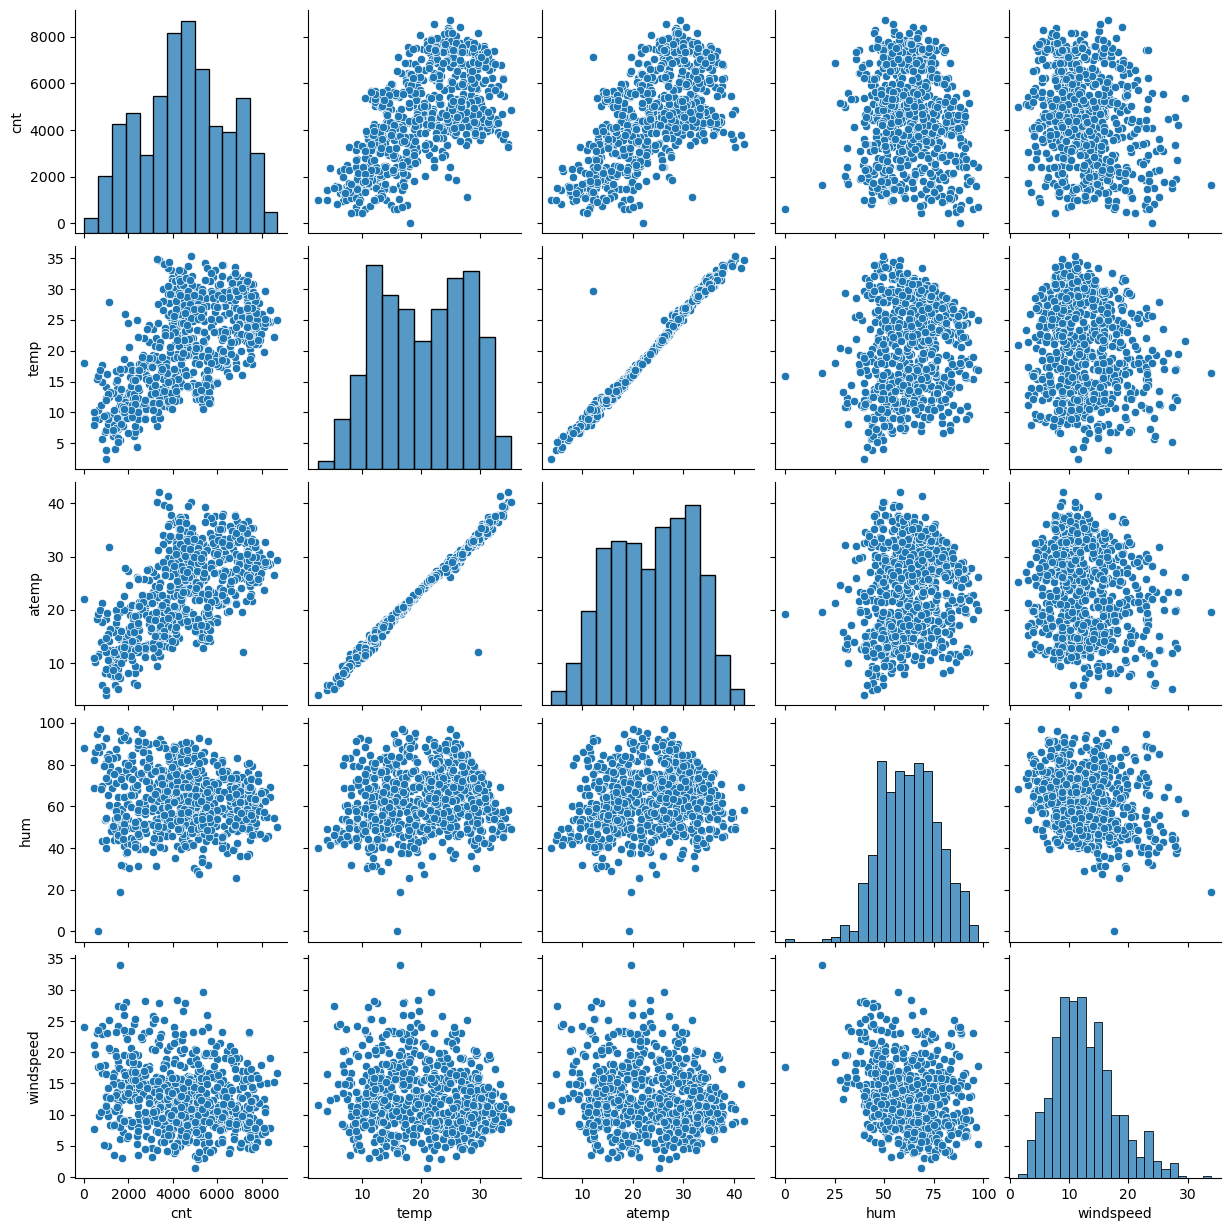

In [762]:
# Plotting for continuous numeric variables

plt.figure(figsize=(15,30))
sns.pairplot(data = bike_sharing_df,vars =['cnt','temp','atemp','hum','windspeed'], palette=['red', 'blue'])
plt.show()

<Figure size 2000x1500 with 0 Axes>

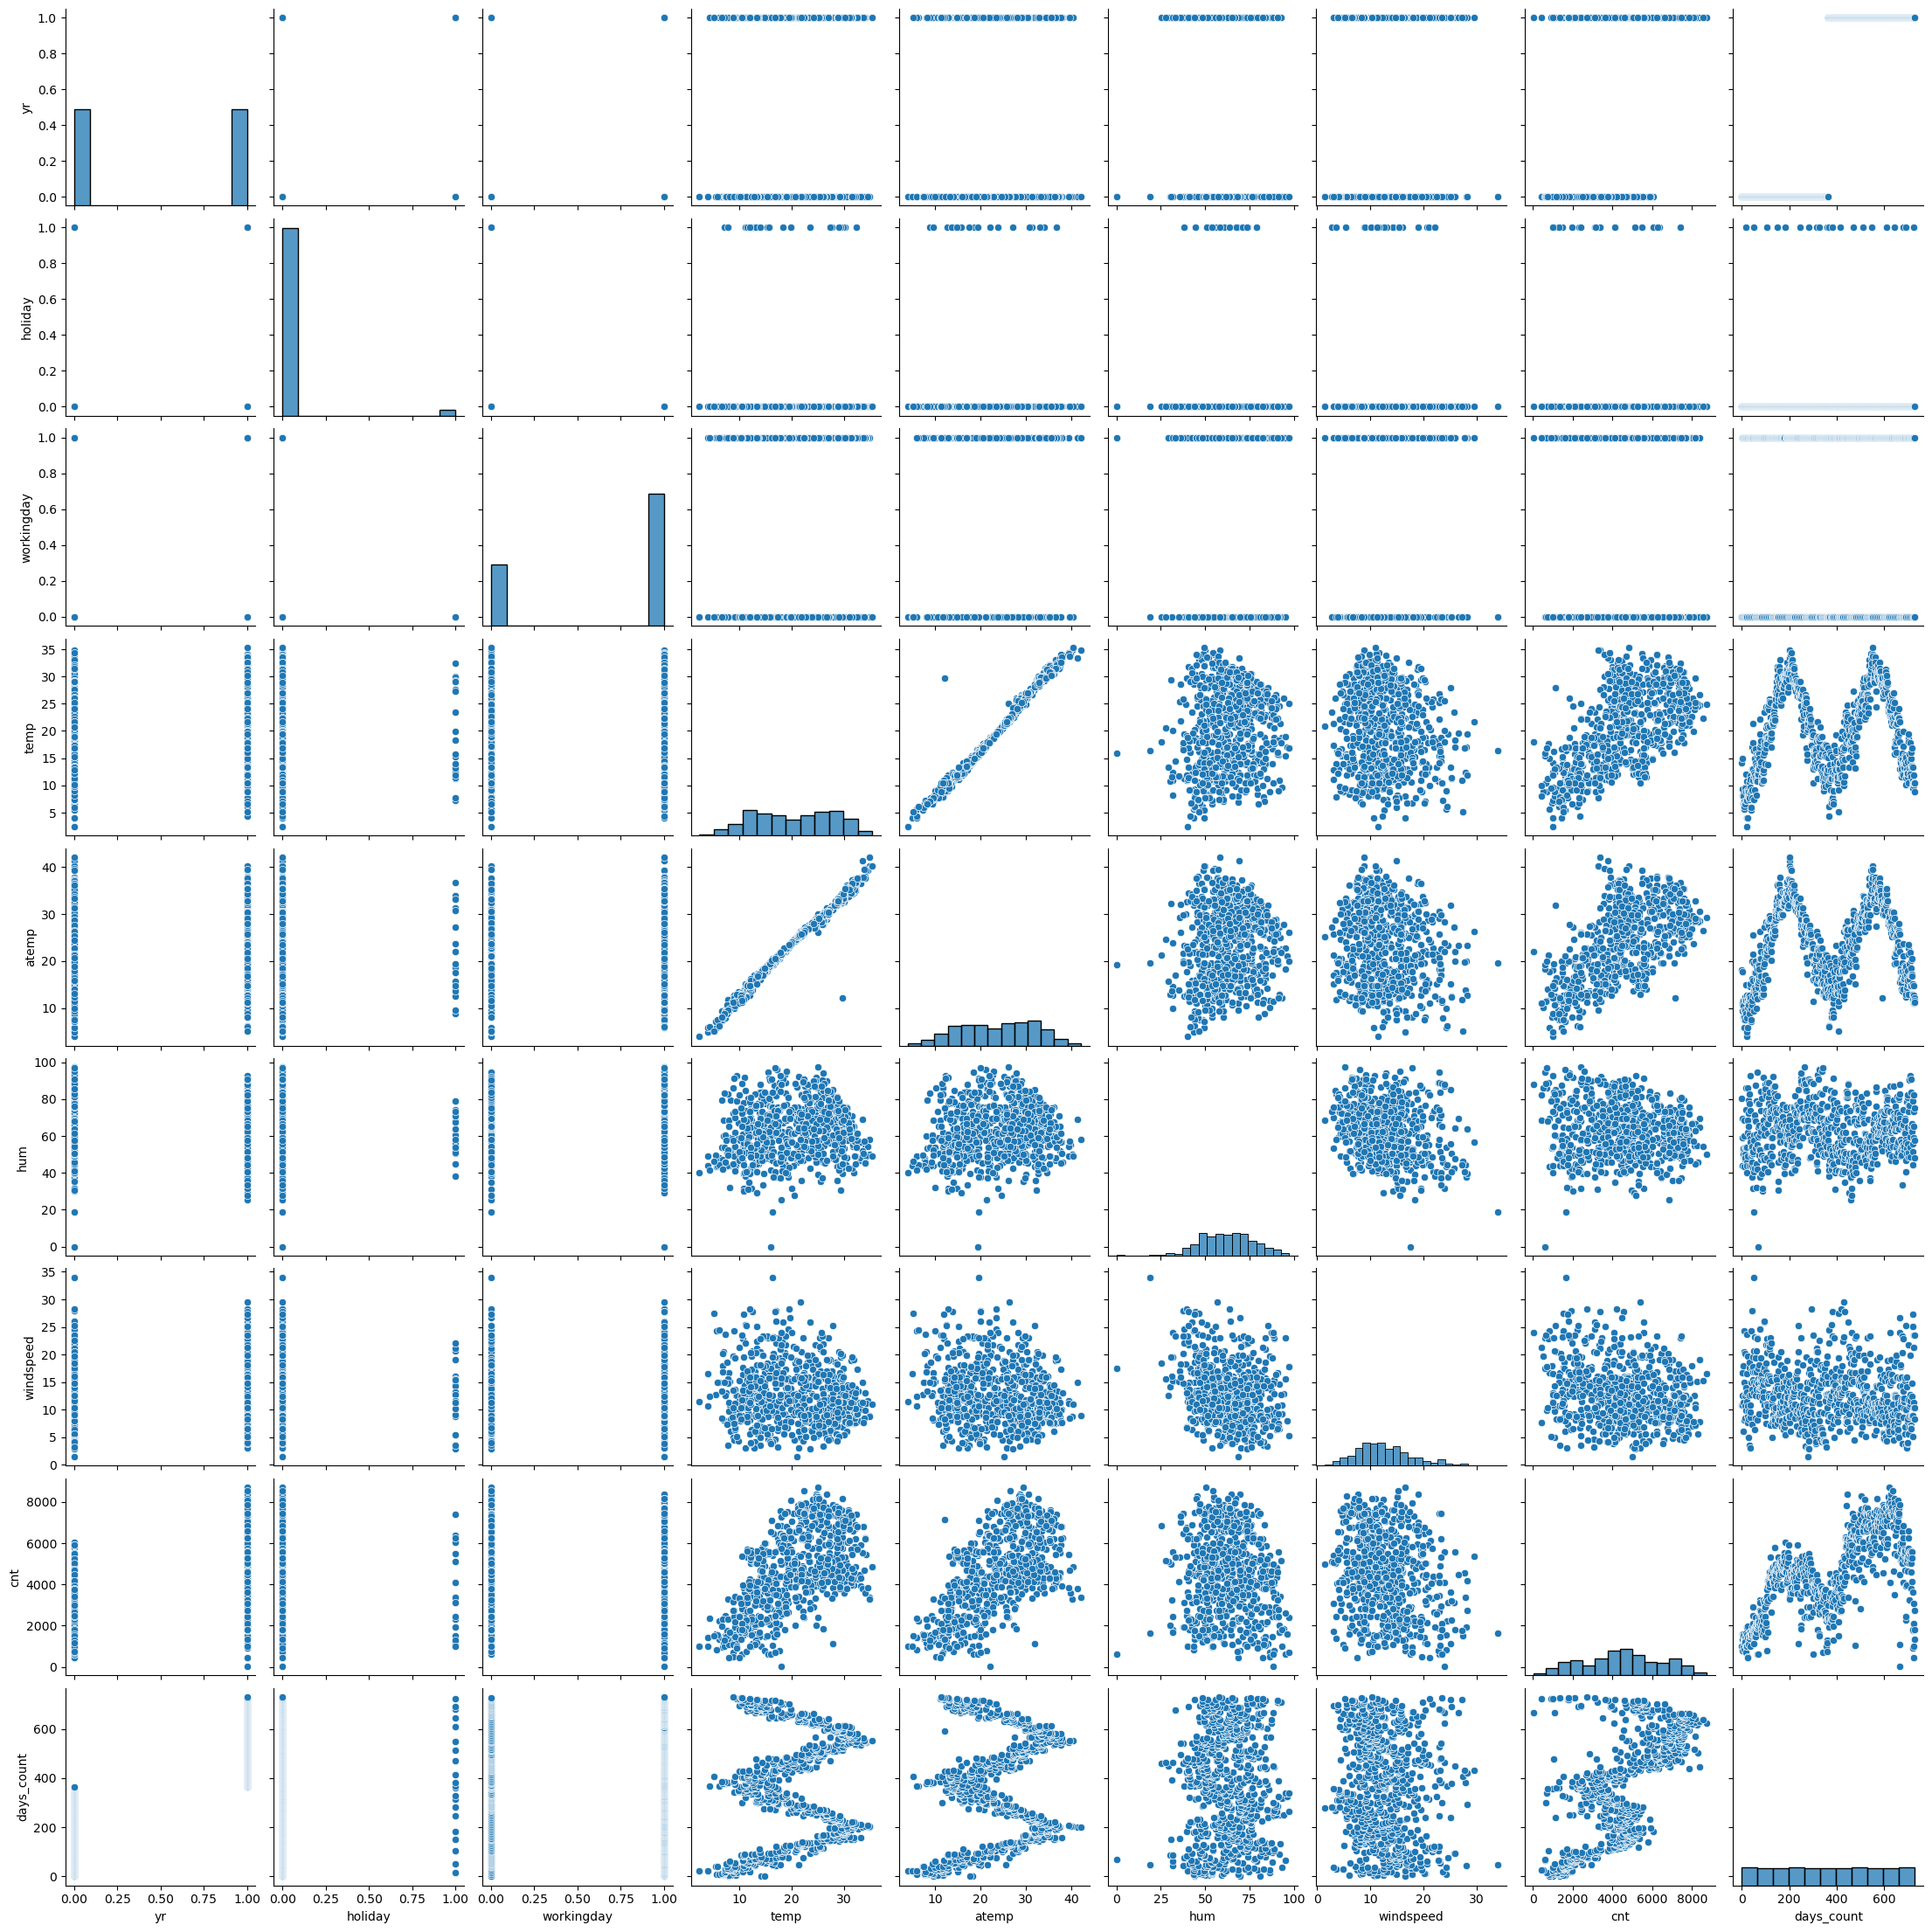

In [765]:
# Visualising data to see co-relation between the numeric variables

plt.figure(figsize = (20,15))
sns.pairplot(bike_sharing_df)
plt.show()

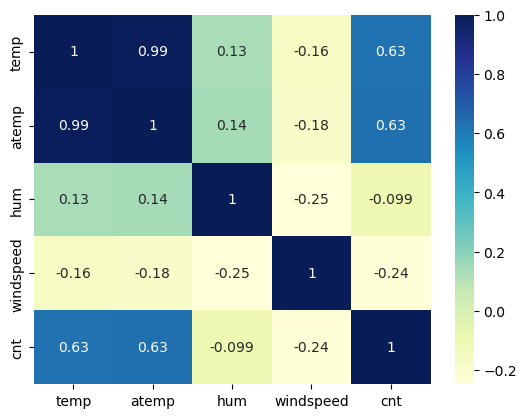

In [766]:
# Co-relation between continous variables

sns.heatmap(bike_sharing_df[['temp','atemp','hum','windspeed','cnt']].corr(),cmap ='YlGnBu',annot = True)
plt.show()

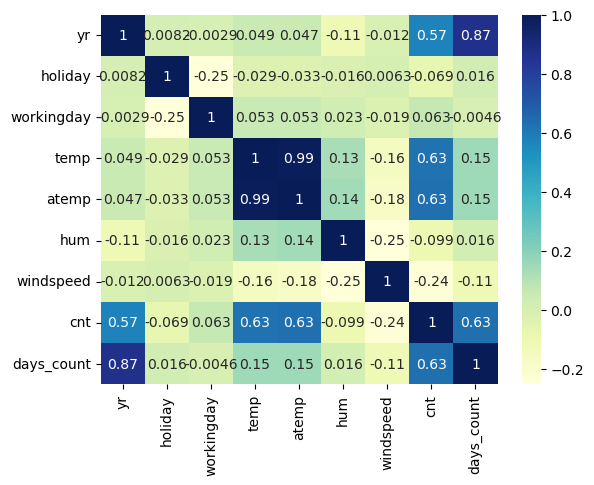

In [769]:
# Co-relation between numeric variables

cor = bike_sharing_df[['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt','days_count']].corr()
sns.heatmap(cor,cmap="YlGnBu",annot = True)
plt.show()

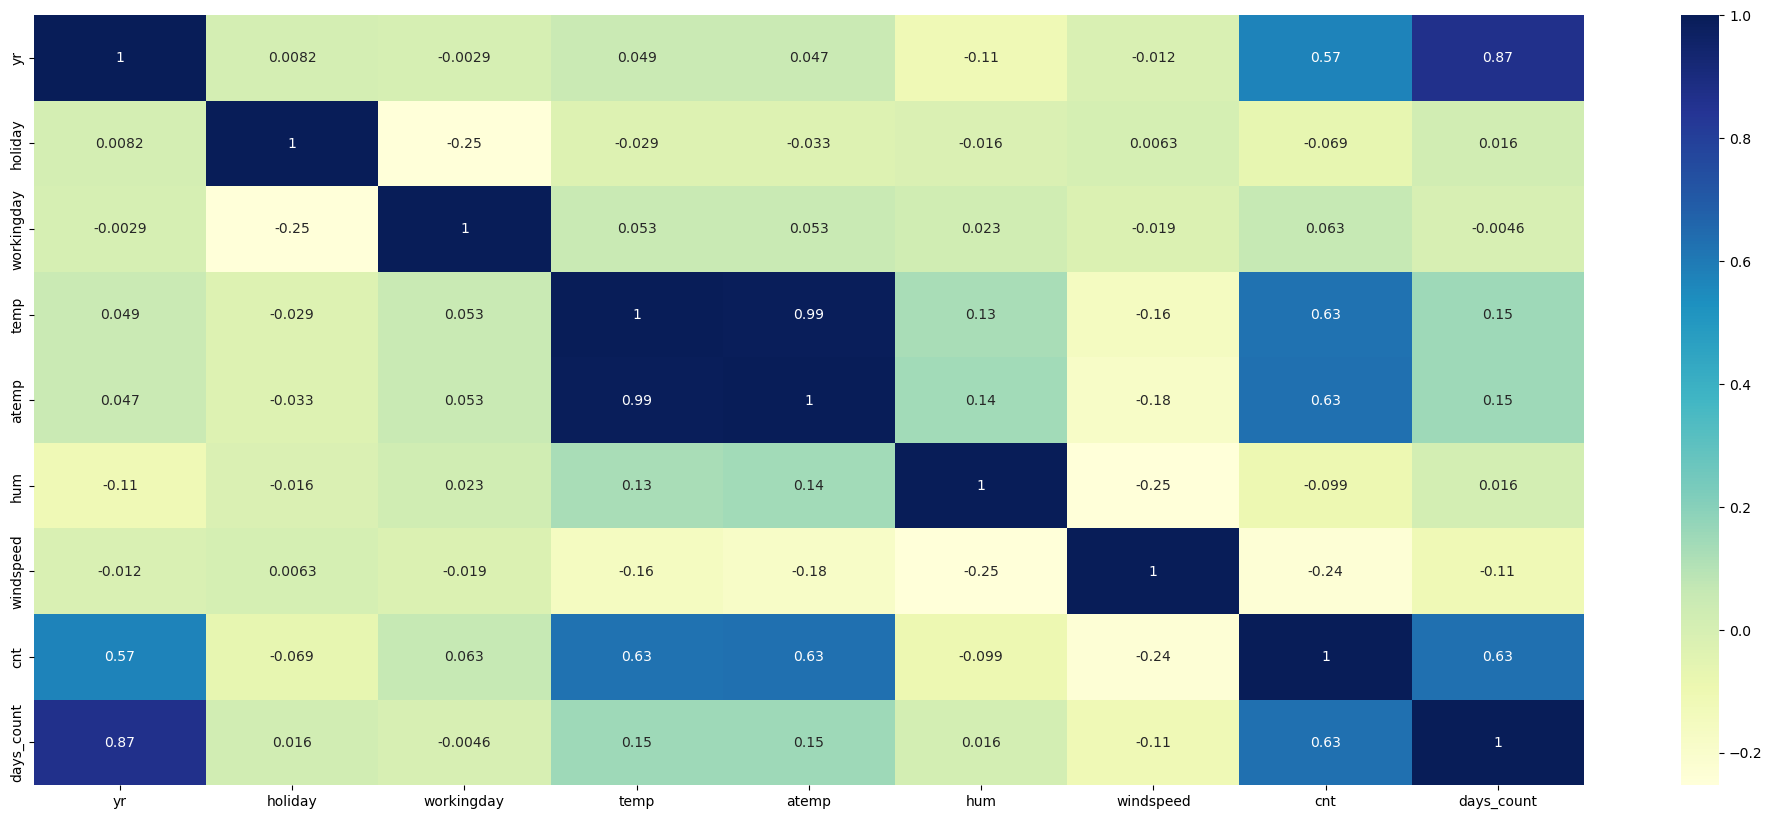

In [771]:
# Calculate correlation

calculate_correlation = bike_sharing_df[['yr','holiday','workingday','temp','atemp','hum','windspeed','cnt','days_count']].corr()
plt.figure(figsize=(25,10))
sns.heatmap(calculate_correlation,annot =True,cmap ='YlGnBu')
plt.show()

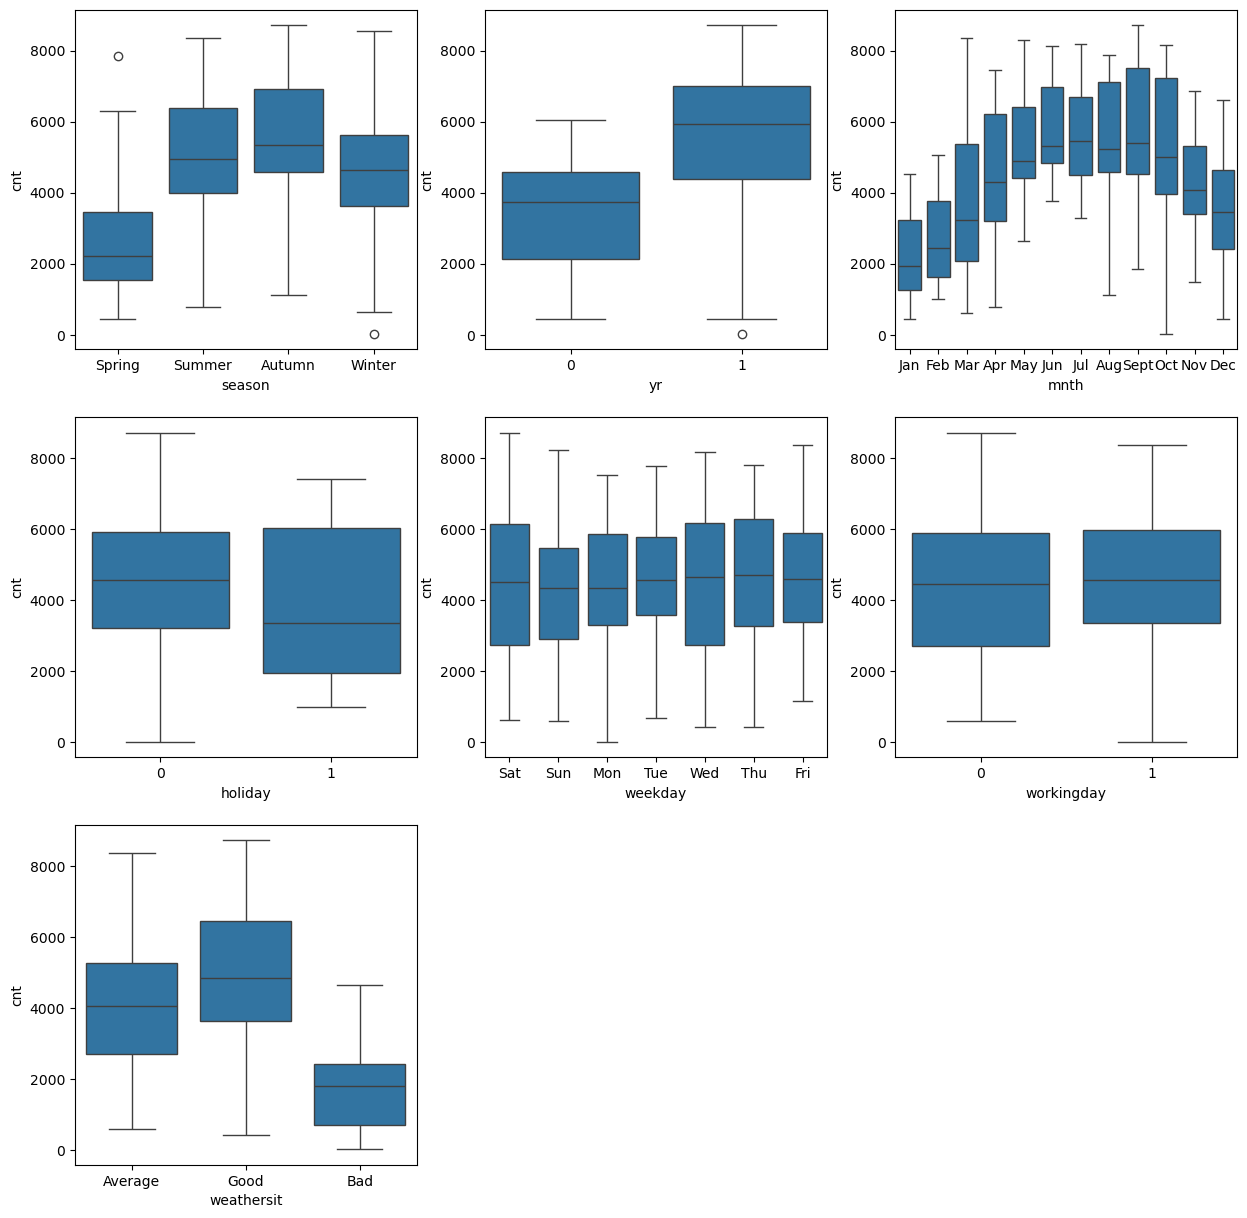

In [773]:
# Analyse Categorical Varibales with Target Variables

vars_cat = ['season','yr','mnth','holiday','weekday','workingday','weathersit']
plt.figure(figsize = (15,15))
for i in enumerate(vars_cat):
    plt.subplot(3,3,i[0]+1)
    sns.boxplot(data = bike_sharing_df,x=i[1],y='cnt')
plt.show()


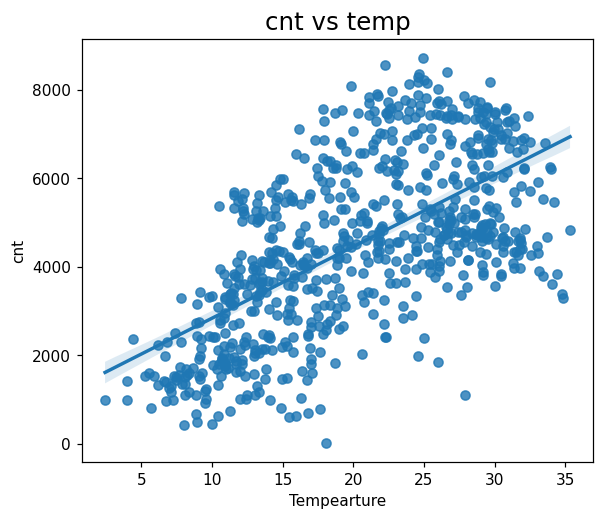

In [775]:
plt.figure(figsize=(6,5),dpi=110)
plt.title('cnt vs temp',fontsize = 16)
sns.regplot(data = bike_sharing_df,y = 'cnt', x='temp')
plt.xlabel('Tempearture')
plt.show()

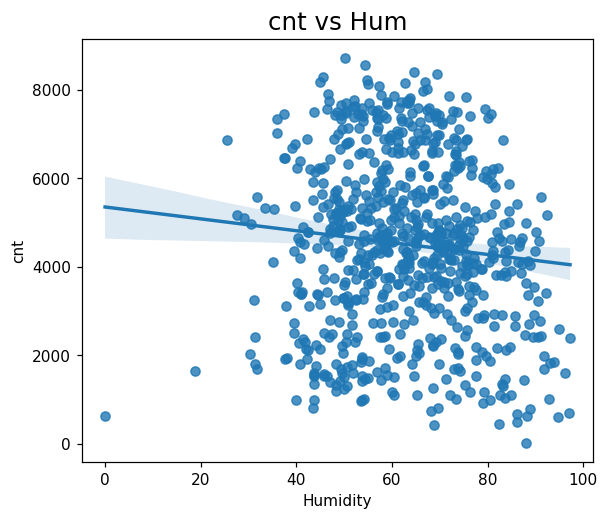

In [777]:
plt.figure(figsize = (6,5),dpi = 110)
plt.title('cnt vs Hum',fontsize = 16)
sns.regplot(data = bike_sharing_df, y = 'cnt', x ='hum')
plt.xlabel('Humidity')
plt.show()

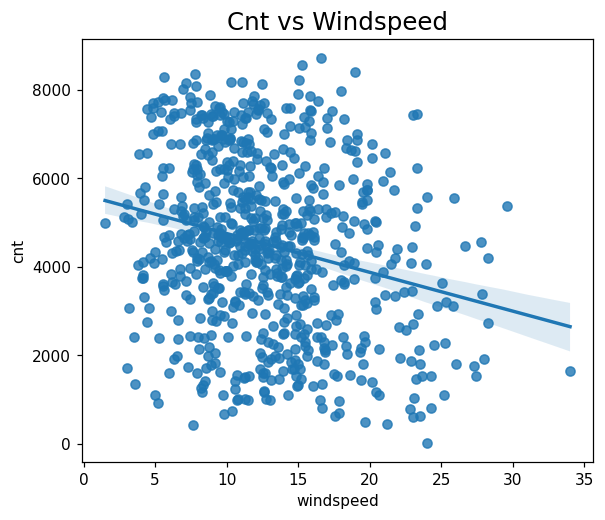

In [779]:
plt.figure(figsize =(6,5),dpi = 110)
plt.title('Cnt vs Windspeed',fontsize = 16)
sns.regplot(data = bike_sharing_df, y ='cnt', x = 'windspeed')
plt.show()

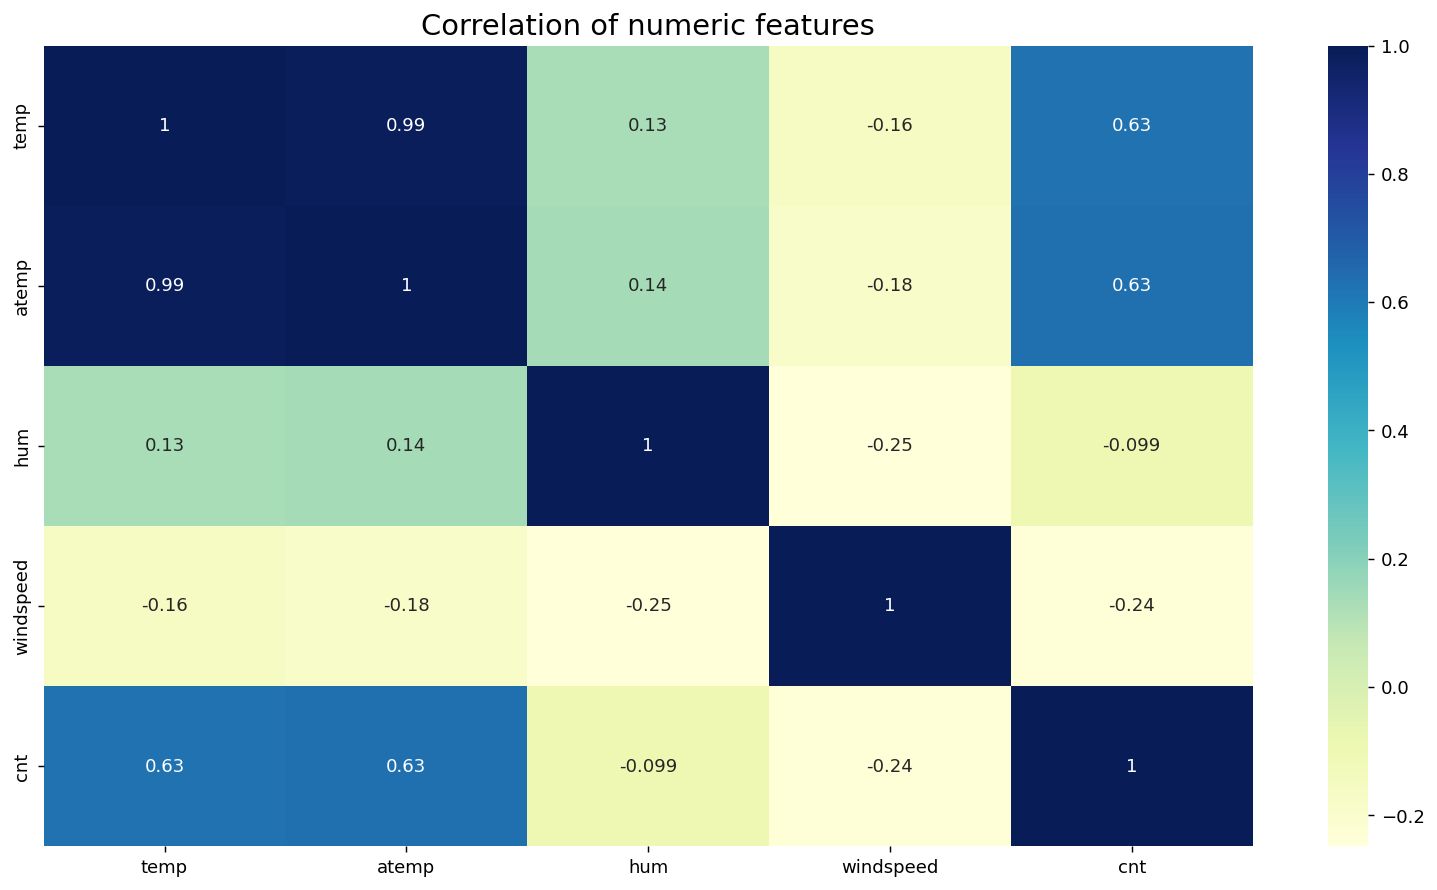

In [781]:
num_features = ['temp','atemp','hum','windspeed','cnt']
plt.figure(figsize =(15,8),dpi =130)
plt.title('Correlation of numeric features',fontsize= 16)
sns.heatmap(bike_sharing_df[num_features].corr(),annot = True,cmap ='YlGnBu')
plt.show()

In [783]:
bike_sharing_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


In [785]:
bike_sharing_df = pd.get_dummies(data = bike_sharing_df,columns = ['season','mnth','weekday'],drop_first = True)
bike_sharing_df = pd.get_dummies(data = bike_sharing_df,columns = ['weathersit'])
bike_sharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_count', 'season_Spring', 'season_Summer', 'season_Winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Average', 'weathersit_Bad',
       'weathersit_Good'],
      dtype='object')

In [787]:
bike_sharing_df.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_count
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,364.500000
std,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,210.877136
min,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000
25%,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,182.250000
50%,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,364.500000
75%,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,546.750000
max,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,729.000000


In [789]:
bike_sharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,days_count,season_Spring,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Average,weathersit_Bad,weathersit_Good
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,True,...,False,False,True,False,False,False,False,True,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,True,...,False,False,False,True,False,False,False,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,2,True,...,False,True,False,False,False,False,False,False,False,True
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,3,True,...,False,False,False,False,False,True,False,False,False,True
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,4,True,...,False,False,False,False,False,False,True,False,False,True


In [791]:
bike_sharing_df.shape

(730, 32)

In [793]:
bike_sharing_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'days_count', 'season_Spring', 'season_Summer', 'season_Winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Average', 'weathersit_Bad',
       'weathersit_Good'],
      dtype='object')

In [795]:
# Model Building: y to contain only target variable & x is all remainign variable also our independent variables

y = bike_sharing_df.pop('cnt')
x = bike_sharing_df

# Train Test split with 70:30 ratio

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 42)
x.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_count,season_Spring,season_Summer,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Average,weathersit_Bad,weathersit_Good
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,True,False,...,False,False,True,False,False,False,False,True,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,True,False,...,False,False,False,True,False,False,False,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,True,False,...,False,False,False,False,False,True,False,False,False,True
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,True,False,...,False,False,False,False,False,False,True,False,False,True


In [797]:
x_train.shape

(511, 31)

In [799]:
# Import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [801]:
# Feature scaling continuous variables

num_vars = ['temp','atemp','hum','windspeed','days_count']
scaler = MinMaxScaler()
x_train[num_vars] = scaler.fit_transform(x_train[num_vars])
x_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_count
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.520548,0.027397,0.669276,0.550874,0.526518,0.654174,0.414873,0.512409
std,0.500067,0.163398,0.470935,0.227231,0.212976,0.143648,0.185619,0.292268
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354221,0.353207,0.544598,0.281934,0.254458
50%,1.000000,0.000000,1.000000,0.575304,0.563297,0.659940,0.384732,0.521262
75%,1.000000,0.000000,1.000000,0.745079,0.698389,0.756977,0.526481,0.770233
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [803]:
x_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_count,season_Spring,season_Summer,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Average,weathersit_Bad,weathersit_Good
683,1,0,1,0.327133,0.322150,0.639330,0.327101,0.936900,False,False,...,False,False,False,False,True,False,False,True,False,False
645,1,1,0,0.403972,0.404998,0.731215,0.419004,0.884774,False,False,...,False,True,False,False,False,False,False,True,False,False
163,0,0,1,0.717562,0.685963,0.509660,0.708724,0.223594,False,True,...,False,True,False,False,False,False,False,False,False,True
360,0,0,1,0.331287,0.326273,0.785745,0.415925,0.493827,True,False,...,False,False,False,False,False,True,False,True,False,False
640,1,0,1,0.745598,0.682653,0.817947,0.110593,0.877915,False,False,...,False,False,False,False,False,False,True,True,False,False


In [805]:
# Build a LR model sklearn for RFE

lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [807]:
rfe = RFE(lr,n_features_to_select = 15)
rfe.fit(x_train,y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [809]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 3),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('days_count', True, 1),
 ('season_Spring', True, 1),
 ('season_Summer', False, 14),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 8),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 12),
 ('mnth_Jan', False, 9),
 ('mnth_Jul', False, 13),
 ('mnth_Jun', False, 10),
 ('mnth_Mar', True, 1),
 ('mnth_May', True, 1),
 ('mnth_Nov', False, 7),
 ('mnth_Oct', True, 1),
 ('mnth_Sept', True, 1),
 ('weekday_Mon', False, 15),
 ('weekday_Sat', False, 2),
 ('weekday_Sun', False, 6),
 ('weekday_Thu', False, 17),
 ('weekday_Tue', False, 11),
 ('weekday_Wed', False, 16),
 ('weathersit_Average', False, 4),
 ('weathersit_Bad', True, 1),
 ('weathersit_Good', True, 1)]

In [843]:
def build_models(cols):
    x_train_sm = sm.add_constant(x_train[cols])
    lm = sm.OLS(y_train , x_train_sm.astype(float)).fit()
    print(lm.summary())
    return lm

In [859]:
def get_vif(cols):
    df1 = x_train[cols].astype(float)
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values,i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'],2)
    print(vif.sort_values(by = 'VIF',ascending = False))

In [863]:
x_train.columns[rfe.support_]

Index(['yr', 'holiday', 'temp', 'atemp', 'hum', 'windspeed', 'days_count',
       'season_Spring', 'season_Winter', 'mnth_Mar', 'mnth_May', 'mnth_Oct',
       'mnth_Sept', 'weathersit_Bad', 'weathersit_Good'],
      dtype='object')

In [865]:
x_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'days_count', 'season_Spring', 'season_Summer', 'season_Winter',
       'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jul', 'mnth_Jun',
       'mnth_Mar', 'mnth_May', 'mnth_Nov', 'mnth_Oct', 'mnth_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Average', 'weathersit_Bad',
       'weathersit_Good'],
      dtype='object')

In [867]:
x_train.head

<bound method NDFrame.head of      yr  holiday  workingday      temp     atemp       hum  windspeed  \
683   1        0           1  0.327133  0.322150  0.639330   0.327101   
645   1        1           0  0.403972  0.404998  0.731215   0.419004   
163   0        0           1  0.717562  0.685963  0.509660   0.708724   
360   0        0           1  0.331287  0.326273  0.785745   0.415925   
640   1        0           1  0.745598  0.682653  0.817947   0.110593   
..   ..      ...         ...       ...       ...       ...        ...   
71    0        0           0  0.405237  0.395131  0.543468   0.621696   
106   0        0           0  0.495350  0.481247  0.494203   0.704080   
270   0        0           1  0.717562  0.651183  0.874624   0.316186   
435   1        0           1  0.507811  0.499487  0.504079   0.464173   
102   0        0           1  0.440316  0.443951  0.844139   0.571635   

     days_count  season_Spring  season_Summer  ...  mnth_Sept  weekday_Mon  \
683    0.936900

In [869]:
x_train.columns[~rfe.support_]

Index(['workingday', 'season_Summer', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb',
       'mnth_Jan', 'mnth_Jul', 'mnth_Jun', 'mnth_Nov', 'weekday_Mon',
       'weekday_Sat', 'weekday_Sun', 'weekday_Thu', 'weekday_Tue',
       'weekday_Wed', 'weathersit_Average'],
      dtype='object')

In [871]:
x_train_rfe = x_train[['yr','holiday','workingday','temp','hum','windspeed','season_Spring','season_Summer','season_Winter','mnth_Jan','mnth_Jul','mnth_Sept','weekday_Sat','weathersit_Bad','weathersit_Average']]

In [897]:
# All columns when selected by RFE

colls = ['yr','holiday','workingday','temp','hum','windspeed','season_Spring','season_Summer','season_Winter','mnth_Jan','mnth_Jul','mnth_Sept','weekday_Sat','weathersit_Bad','weathersit_Average']
build_models(colls)
get_vif(colls)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     167.9
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          4.52e-183
Time:                        02:42:59   Log-Likelihood:                -4131.1
No. Observations:                 511   AIC:                             8294.
Df Residuals:                     495   BIC:                             8362.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2373.1199    345

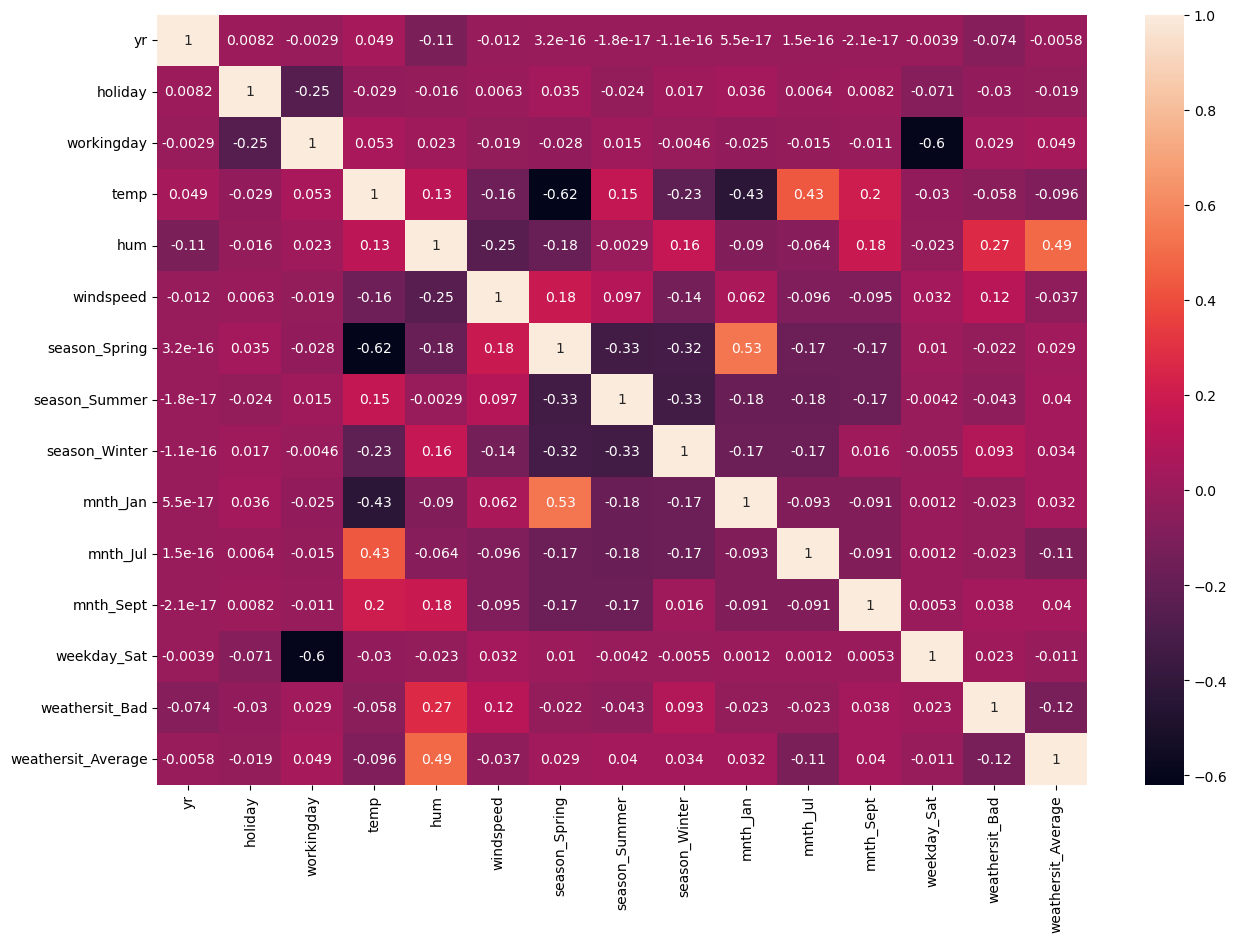

In [893]:
# Checking correlation of features selected by RFE with target column.

plt.figure(figsize = (15,10))
sns.heatmap(bike_sharing_df[['yr','holiday','workingday','temp','hum','windspeed','season_Spring','season_Summer','season_Winter','mnth_Jan','mnth_Jul','mnth_Sept','weekday_Sat','weathersit_Bad','weathersit_Average']].corr(),annot = True)
plt.show()

In [903]:
# Dropping mnth_jan as it has negative coefficient and p value is insignificant

cols = ['yr','holiday','workingday','temp','hum','windspeed','season_Spring','season_Summer','season_Winter','mnth_Jul','mnth_Sept','weekday_Sat','weathersit_Bad','weathersit_Average']
build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.2
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          3.59e-184
Time:                        02:46:41   Log-Likelihood:                -4131.2
No. Observations:                 511   AIC:                             8292.
Df Residuals:                     496   BIC:                             8356.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2357.7484    343

In [905]:
# Dropping hum as it has negative coefficient and p value is insignificant

cols =['yr','holiday','workingday','temp','windspeed','season_Spring','season_Summer','season_Winter','mnth_Jul','mnth_Sept','weekday_Sat','weathersit_Bad','weathersit_Average']
build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     186.5
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          1.46e-181
Time:                        02:46:43   Log-Likelihood:                -4140.1
No. Observations:                 511   AIC:                             8308.
Df Residuals:                     497   BIC:                             8368.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1524.3398    284

In [907]:
# Dropping holiday as it has negative coefficient and p value is insignificant

cols = ['yr','workingday','temp','windspeed','season_Spring','season_Summer','season_Winter','mnth_Jul','mnth_Sept','weekday_Sat','weathersit_Bad','weathersit_Average']
build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     200.9
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          4.56e-182
Time:                        02:48:20   Log-Likelihood:                -4141.7
No. Observations:                 511   AIC:                             8309.
Df Residuals:                     498   BIC:                             8364.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1458.3161    282

In [909]:
# Dropping mnth_Jul as it has negative coefficient and p value is insignificant

cols = ['yr','workingday','temp','windspeed','season_Spring','season_Summer','season_Winter','mnth_Sept','weekday_Sat','weathersit_Bad','weathersit_Average']

build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     217.9
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          1.57e-182
Time:                        02:50:14   Log-Likelihood:                -4143.4
No. Observations:                 511   AIC:                             8311.
Df Residuals:                     499   BIC:                             8362.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1392.1476    281

In [911]:
# Dropping temp as it has negative coefficient and p value is insignificant
cols = ['yr','workingday','windspeed','season_Spring','season_Summer','season_Winter','mnth_Sept',
       'weekday_Sat','weathersit_Bad','weathersit_Average']
build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     163.3
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          1.84e-150
Time:                        02:51:08   Log-Likelihood:                -4222.0
No. Observations:                 511   AIC:                             8466.
Df Residuals:                     500   BIC:                             8513.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4634.1026    167

In [913]:
# Replacing July with spring as both were highly correlated
cols = ['yr','workingday','windspeed','mnth_Jul','season_Summer','season_Winter','mnth_Sept','weekday_Sat','weathersit_Bad','weathersit_Average']

build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.616
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     80.06
Date:                Thu, 05 Dec 2024   Prob (F-statistic):           3.93e-97
Time:                        02:53:03   Log-Likelihood:                -4348.4
No. Observations:                 511   AIC:                             8719.
Df Residuals:                     500   BIC:                             8765.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2851.5231    208

In [921]:
# Replacing windspeed with spring as windspeed was highly correlated with temp
cols = ['yr','workingday','season_Spring','mnth_Jul','season_Summer','season_Winter','mnth_Sept','weekday_Sat','weathersit_Bad','weathersit_Average']

build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.756
Model:                            OLS   Adj. R-squared:                  0.751
Method:                 Least Squares   F-statistic:                     154.6
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          5.90e-146
Time:                        02:54:53   Log-Likelihood:                -4232.7
No. Observations:                 511   AIC:                             8487.
Df Residuals:                     500   BIC:                             8534.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4162.3897    168

In [925]:
# Using the weekend 'sunday' which was dropped during RFE instead of saturday.
cols = ['yr','workingday','season_Spring','mnth_Jul','season_Summer','season_Winter','mnth_Sept','weekday_Sun','weathersit_Bad','weathersit_Average']

build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.748
Method:                 Least Squares   F-statistic:                     152.6
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          6.32e-145
Time:                        02:55:51   Log-Likelihood:                -4235.1
No. Observations:                 511   AIC:                             8492.
Df Residuals:                     500   BIC:                             8539.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               4479.8636    162

In [927]:
# Adding temp and removing 'season_summer' and 'workingday'
cols = ['yr','season_Spring','mnth_Jul','season_Winter','mnth_Sept','weekday_Sun','weathersit_Bad','weathersit_Average','temp']

build_models(cols)
get_vif(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          2.33e-179
Time:                        02:56:52   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1849.3111    204

In [929]:
def build_model_sk(x,y):
    lr1 = LinearRegression()
    lr1.fit(x,y)
    return lr1

In [931]:
lr = build_model_sk(x_train[cols],y_train)
print(lr.intercept_,lr.coef_)

1849.3111141436184 [ 2001.88568746 -1170.12801426  -482.89359595   494.76805882
   483.00061976  -335.8335287  -2305.32363933  -665.38449026
  3917.73381585]


In [935]:
y_train_pred = lr.predict(x_train[cols])

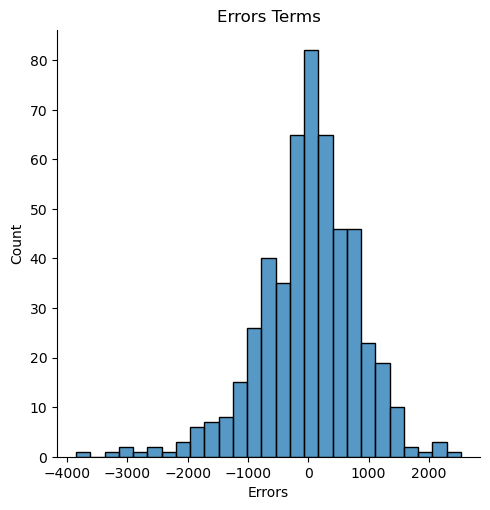

In [937]:
def plot_res_dist(act,pred):
    sns.displot(act-pred)
    plt.title('Errors Terms')
    plt.xlabel('Errors')

plot_res_dist(y_train,y_train_pred)

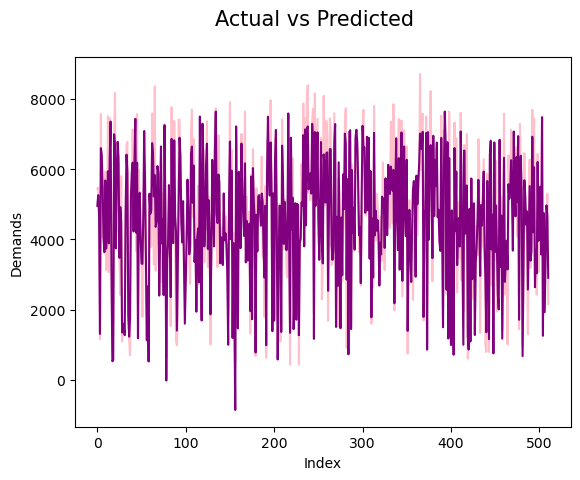

In [941]:
c = [i for i in range(0,len(x_train),1)]
plt.plot(c,y_train,color = 'pink')
plt.plot(c,y_train_pred, color = 'purple')
plt.suptitle('Actual vs Predicted',fontsize = 15)
plt.xlabel('Index')
plt.ylabel('Demands')
plt.show()

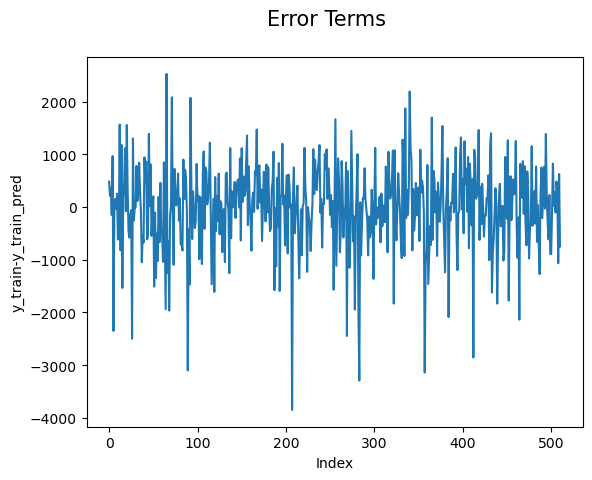

In [943]:
c = [i for i in range(0,len(x_train),1)]
plt.plot(c,y_train-y_train_pred)
plt.suptitle('Error Terms',fontsize = 15)
plt.xlabel('Index')
plt.ylabel('y_train-y_train_pred')
plt.show()

In [945]:
r2_score(y_train,y_train_pred)

0.8185359364498817

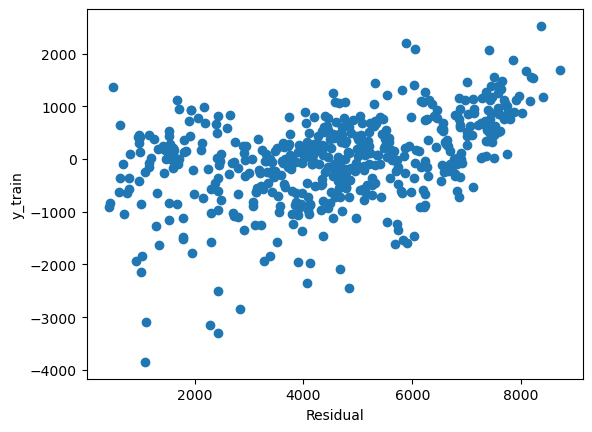

In [947]:
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel('y_train')
plt.xlabel('Residual')
plt.show()

In [949]:
num_vars = ['temp','atemp','hum','windspeed','days_count']
x_test[num_vars] = scaler.transform(x_test[num_vars])

cols =  ['yr','season_Spring','mnth_Jul','season_Winter','mnth_Sept','weekday_Sun','weathersit_Bad','weathersit_Average','temp']
y_test_pred = lr.predict(x_test[cols])

In [951]:
r2_score(y_test,y_test_pred)

0.815903608839324

Text(0, 0.5, 'y_test')

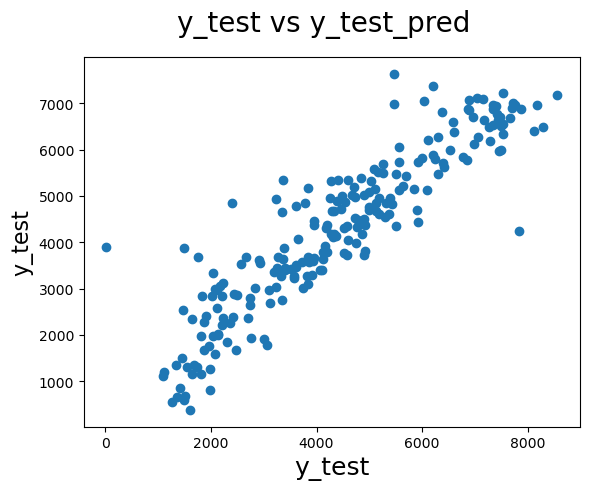

In [953]:
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)
plt.xlabel('y_test',fontsize =18)
plt.ylabel('y_test',fontsize = 16)

In [961]:
def plot_act_pred(act,pred,scale,dataname):
    c = [i for i in range(1,scale,1)]
    fig = plt.figure(figsize =(14,5))
    plt.plot(c,act,color ='gray', linewidth = 2.5, linestyle = '-')
    plt.plot(c,pred,color = 'blue',linewidth = 2.5, linestyle = '-')
    fig.suptitle('Actual and Predicted - '+dataname,fontsize = 20)
    plt.xlabel('Index',fontsize = 18)
    plt.ylabel('Counts',fontsize = 16)

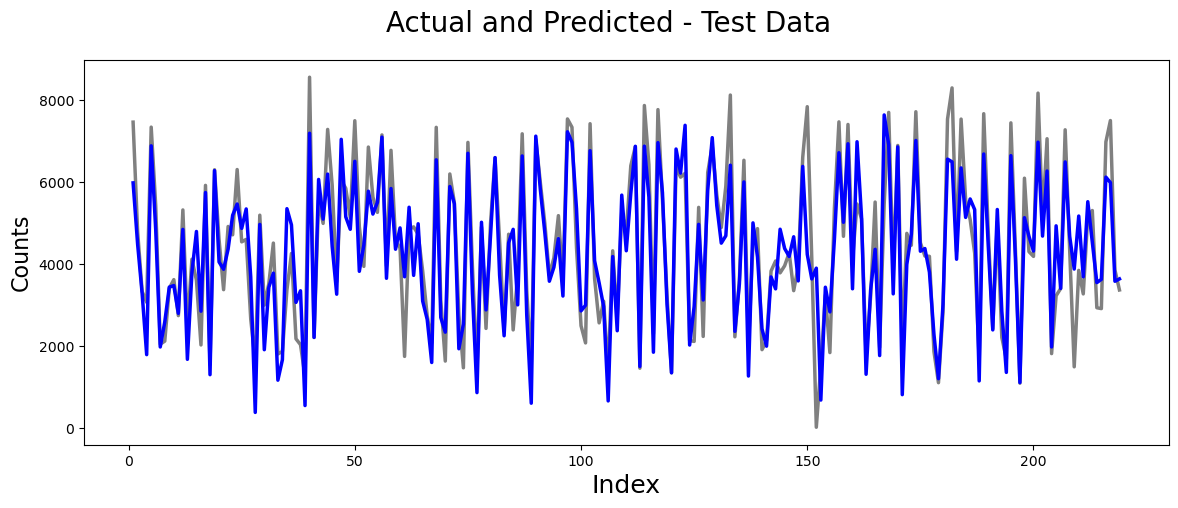

In [963]:
plot_act_pred(y_test,y_test_pred,len(y_test)+1,'Test Data')

In [965]:
def plot_err_terms(act,pred):
    c = [i for i in range(1,220,1)]
    fig = plt.figure(figsize = (14,5))
    plt.plot(c,act-pred,color='blue',marker = 'o', linewidth = 2.5, linestyle ='')
    fig.suptitle('Error Terms', fontsize = 20)
    plt.xlabel('Index', fontsize = 18)
    plt.ylabel('Count - Predicted counts', fontsize= 16)

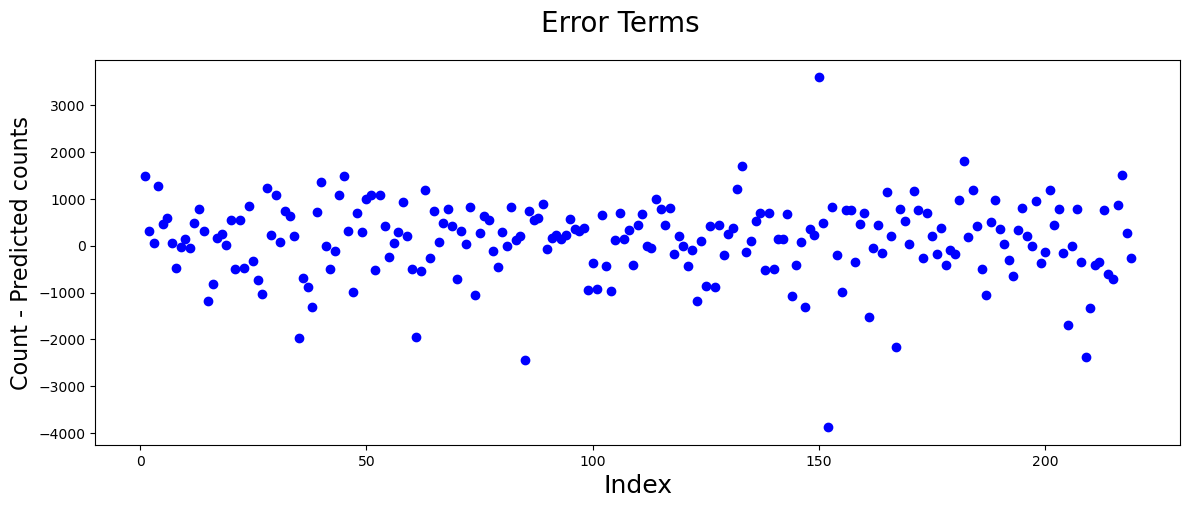

In [969]:
plot_err_terms(y_test,y_test_pred)

In [971]:
bike_sharing_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,days_count,season_Spring,season_Summer,...,mnth_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Average,weathersit_Bad,weathersit_Good
0,0,0,0,14.110847,18.18125,80.5833,10.749882,0,True,False,...,False,False,True,False,False,False,False,True,False,False
1,0,0,0,14.902598,17.68695,69.6087,16.652113,1,True,False,...,False,False,False,True,False,False,False,True,False,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,2,True,False,...,False,True,False,False,False,False,False,False,False,True
3,0,0,1,8.200000,10.60610,59.0435,10.739832,3,True,False,...,False,False,False,False,False,True,False,False,False,True
4,0,0,1,9.305237,11.46350,43.6957,12.522300,4,True,False,...,False,False,False,False,False,False,True,False,False,True


In [973]:
cols = ['yr','season_Spring','mnth_Jul','season_Winter','mnth_Sept','weekday_Sun','weathersit_Bad','weathersit_Average','temp']
lm = build_models(cols)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.815
Method:                 Least Squares   F-statistic:                     251.1
Date:                Thu, 05 Dec 2024   Prob (F-statistic):          2.33e-179
Time:                        03:06:02   Log-Likelihood:                -4156.6
No. Observations:                 511   AIC:                             8333.
Df Residuals:                     501   BIC:                             8376.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1849.3111    204